In [97]:
import pandas as pd
import seaborn as sns
import numpy as np


import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

from sklearn.model_selection import KFold

from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

In [77]:
df = pd.read_excel('C:\\Users\\mabbasi4\\Desktop\\Churn_ Prediction\\datasets\\E_Commerce_Dataset.xlsx',sheet_name ='E_Comm')

In [78]:
len(df)

5630

In [79]:
nan_count = df.isna().sum().sum()
print(nan_count )

1856


In [80]:
df.fillna(df.median(), inplace=True)

C:\Users\mabbasi4\AppData\Local\Temp\ipykernel_7960\3604797450.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median(), inplace=True)


In [81]:
nan_count = df.isna().sum().sum()
print(nan_count )

0


In [82]:
df.head(3)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28


# Undersampling

In [83]:
#Undersampling to handle class imbalance
def Under_Sampling(df):
  df_pos = df[df['Churn'] == 1]
  df_neg = df[df['Churn'] == 0]
  msk = np.random.rand(len(df_neg)) < 0.25
  print (len(msk))
  df_neg_sample = df_neg[msk]
  df_sample_data = pd.concat([df_pos,df_neg_sample])
  df_sample_data = df_sample_data.sample(frac=1).reset_index(drop=True)
  return df_sample_data


In [84]:
df = Under_Sampling(df)  
category_count = df['Churn'].value_counts()
categories = category_count.index

4682


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


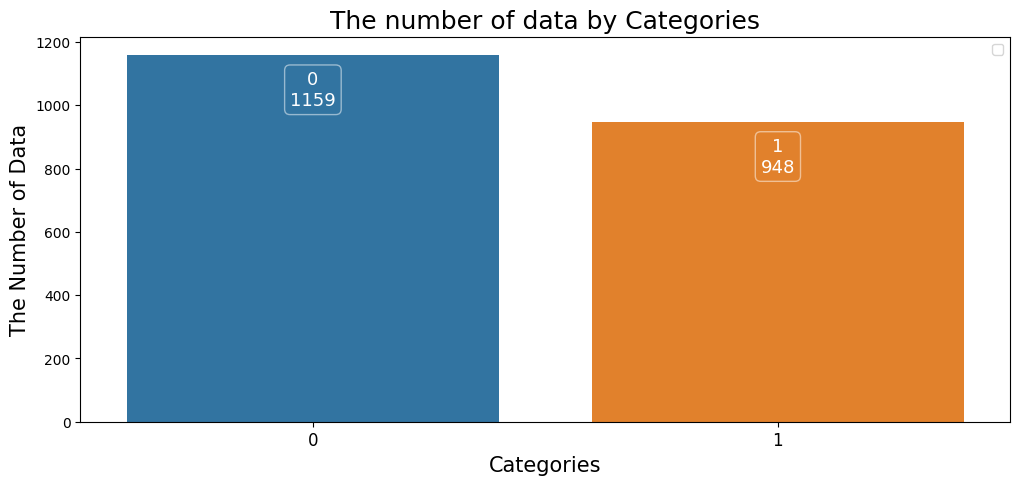

In [85]:


fig = plt.figure(figsize= (12, 5))

ax = fig.add_subplot(111)

sns.barplot(x = category_count.index, y = category_count )

for a, p in enumerate(ax.patches):
    ax.annotate(f'{categories[a]}\n' + format(p.get_height(), '.0f'), xy = (p.get_x() + p.get_width() / 2.0, p.get_height()), xytext = (0,-25), size = 13, color = 'white' , ha = 'center', va = 'center', textcoords = 'offset points', bbox = dict(boxstyle = 'round', facecolor='none',edgecolor='white', alpha = 0.5) )
    
plt.xlabel('Categories', size = 15)

plt.ylabel('The Number of Data', size= 15)

plt.xticks(size = 12)

plt.title("The number of data by Categories" , size = 18)

plt.legend()

plt.show()

# Data Encoding

In [86]:
df['Gender'].replace({'Male': 1,'Female': 0},inplace=True)

# Train-Test split

In [87]:
drop_cols = ['CustomerID', 'Churn']
y = df['Churn']

X = df.drop(drop_cols,axis=1)
X = pd.get_dummies(X)

#Training the model on whole train datasets
X_train,x_test,Y_train,y_test = train_test_split(X,y,test_size = 0.2)


# Model Training 

In [88]:
clf_xgb = xgb.XGBClassifier()
grid_values = {'max_depth': [3,6,20],'n_estimators':[100,500,1000],'learning_rate':[0.01,0.1,0.3]}
grid_clf_xgb = GridSearchCV(clf_xgb, param_grid = grid_values, cv = 5)
grid_clf_xgb.fit(X_train, Y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 6, 20],
                         'n_estimators': [100, 500, 1000]})

# Result Analysis

In [89]:
print (grid_clf_xgb.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_learning_rate', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [90]:
split0_test_score = grid_clf_xgb.cv_results_["split0_test_score"]
split1_test_score = grid_clf_xgb.cv_results_["split1_test_score"]
split2_test_score = grid_clf_xgb.cv_results_["split2_test_score"]
split3_test_score = grid_clf_xgb.cv_results_["split3_test_score"]
split4_test_score = grid_clf_xgb.cv_results_["split4_test_score"]



print ("split0_test_score  :  ", split0_test_score)
print ("split1_test_score  :  ", split1_test_score)
print ("split2_test_score  :  ", split2_test_score)
print ("split3_test_score  :  ", split3_test_score)
print ("split4_test_score  :  ", split4_test_score)




split0_test_score  :   [0.77448071 0.81008902 0.83086053 0.82492582 0.87833828 0.90504451
 0.87240356 0.92581602 0.92581602 0.83976261 0.89910979 0.91691395
 0.91097923 0.92284866 0.91988131 0.92878338 0.92878338 0.92581602
 0.884273   0.91394659 0.92284866 0.91988131 0.91691395 0.92284866
 0.93768546 0.9347181  0.93175074]
split1_test_score  :   [0.83382789 0.8694362  0.88724036 0.87240356 0.90207715 0.91691395
 0.88724036 0.91394659 0.92581602 0.88130564 0.91097923 0.91988131
 0.92878338 0.94065282 0.93175074 0.93175074 0.94065282 0.94065282
 0.88130564 0.91097923 0.90801187 0.92581602 0.92284866 0.91691395
 0.9347181  0.93768546 0.93768546]
split2_test_score  :   [0.80712166 0.83382789 0.85459941 0.85163205 0.87240356 0.89317507
 0.86053412 0.90504451 0.91097923 0.85163205 0.89910979 0.90504451
 0.89317507 0.91097923 0.91394659 0.89910979 0.91097923 0.91097923
 0.87537092 0.91394659 0.91097923 0.89910979 0.91691395 0.91097923
 0.91097923 0.91097923 0.91394659]
split3_test_score  :  

In [91]:
mean_test_score = grid_clf_xgb.cv_results_["mean_test_score"]
print (mean_test_score)

[0.80593472 0.8421365  0.85519288 0.84747774 0.88367953 0.90326409
 0.87002967 0.91394659 0.92106825 0.85459941 0.90029674 0.91097923
 0.91097923 0.92462908 0.92225519 0.91750742 0.92344214 0.92284866
 0.87596439 0.90801187 0.90979228 0.91216617 0.91691395 0.915727
 0.9264095  0.92403561 0.92522255]


In [92]:
print ("Max_split0_test_score  :  ", max(split0_test_score))
print ("Max_split1_test_score  :  ", max(split1_test_score))
print ("Max_split2_test_score  :  ", max(split2_test_score))
print ("Max_split3_test_score  :  ", max(split3_test_score))
print ("Max_split4_test_score  :  ", max(split4_test_score))

Max_split0_test_score  :   0.9376854599406528
Max_split1_test_score  :   0.9406528189910979
Max_split2_test_score  :   0.9169139465875371
Max_split3_test_score  :   0.9228486646884273
Max_split4_test_score  :   0.9376854599406528


In [93]:
print (grid_clf_xgb.best_params_)

{'learning_rate': 0.3, 'max_depth': 20, 'n_estimators': 100}


# Model Prediction

In [94]:
pred = grid_clf_xgb.predict(x_test)

# Performance Evaluation

In [95]:
#Molde Evaluation metrivs
cm = confusion_matrix(y_test,pred)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       231
           1       0.90      0.94      0.92       191

    accuracy                           0.93       422
   macro avg       0.93      0.93      0.93       422
weighted avg       0.93      0.93      0.93       422



# Confusion Matrix Visualization

Text(50.722222222222214, 0.5, 'Truth')

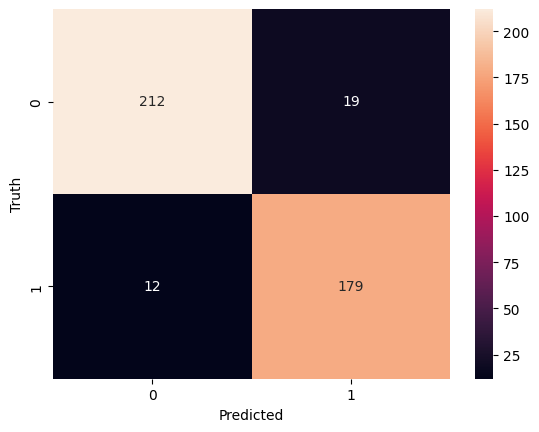

In [96]:
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')